Dataset saved as 'scroe_factors.csv'
   self_study_hours  exercise_hours  mental_health  gaming_hours  \
0          2.996321        1.396323              8      1.123506   
1          7.605714        1.072193              3      0.900052   
2          5.855952        0.619055              8      0.442778   
3          4.789268        1.627590              5      0.516545   
4          1.248149        1.369462              1      2.923354   

   hang_out_hours  exam_score  
0        0.689114   68.987322  
1        3.315210   82.539787  
2        0.009399   87.872829  
3        0.891863   80.896648  
4        0.145357   51.901273  


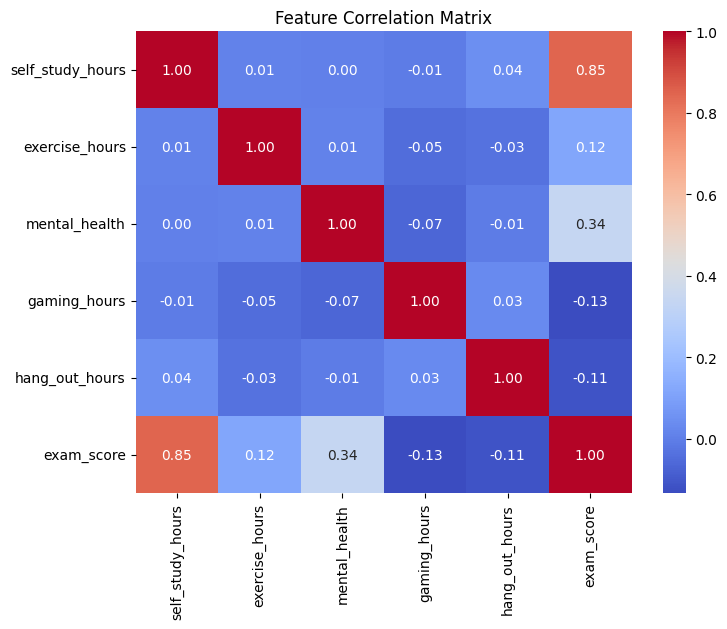

In [1]:
# create data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Set seed for reproducibility
np.random.seed(42)

# 2) Number of samples
n_samples = 500

# 3) Generate synthetic features
self_study_hours = np.random.uniform(0, 8, n_samples)    # 0–8 hours/day
exercise_hours   = np.random.uniform(0, 2, n_samples)    # 0–2 hours/day
mental_health    = np.random.randint(1, 11, n_samples)   # Scale 1–10
gaming_hours     = np.random.uniform(0, 5, n_samples)    # 0–5 hours/day
hang_out_hours   = np.random.uniform(0, 5, n_samples)    # 0–5 hours/day

# 4) True coefficients and intercept
coeffs = {
    'self_study_hours': 5.0,
    'exercise_hours':   2.0,
    'mental_health':    1.5,
    'gaming_hours':    -1.0,
    'hang_out_hours':  -1.2
}
intercept = 50

# 5) Generate exam_score with Gaussian noise
noise = np.random.normal(0, 5, n_samples)  # mean=0, std=5
exam_score = (
    coeffs['self_study_hours'] * self_study_hours +
    coeffs['exercise_hours']   * exercise_hours +
    coeffs['mental_health']    * mental_health +
    coeffs['gaming_hours']     * gaming_hours +
    coeffs['hang_out_hours']   * hang_out_hours +
    intercept +
    noise
)

# 6) Build DataFrame
df = pd.DataFrame({
    'self_study_hours': self_study_hours,
    'exercise_hours':   exercise_hours,
    'mental_health':    mental_health,
    'gaming_hours':     gaming_hours,
    'hang_out_hours':   hang_out_hours,
    'exam_score':       exam_score
})

# 7) Save to CSV
df.to_csv('score_factors.csv', index=False)
print("Dataset saved as 'scroe_factors.csv'")

# 8) (Optional) Quick EDA: display head and correlation heatmap
print(df.head())
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [3]:
# multiple regression
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load data as df
df = pd.read_csv('score_factors.csv')

# create feature columns and targe
feature_cols = ['self_study_hours', 'exercise_hours', 'mental_health', 'gaming_hours', 'hang_out_hours']
target_col = 'exam_score'

# define X and y
X = df[feature_cols]
y = df[target_col]

# split train 80% test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
    )

# fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE = {mse:.2f}')
print(f'R squre = {r2:.2f}')

MSE = 22.48
R squre = 0.88


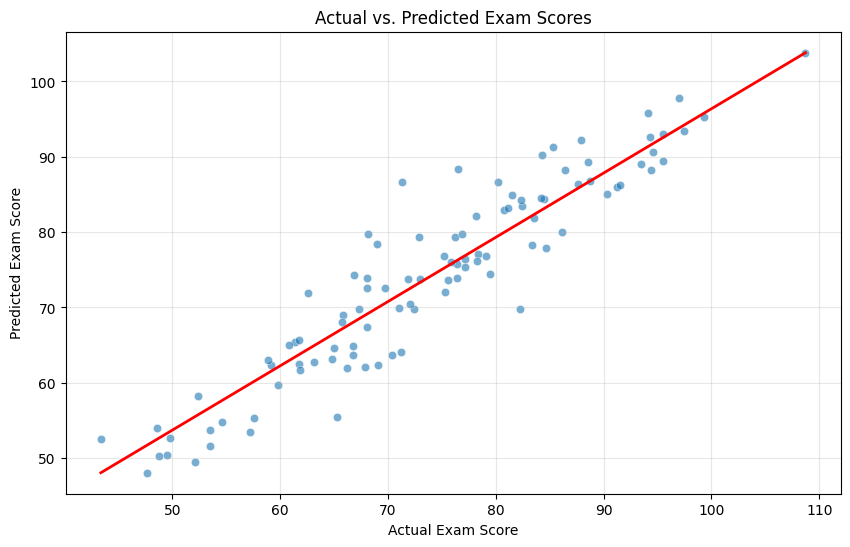

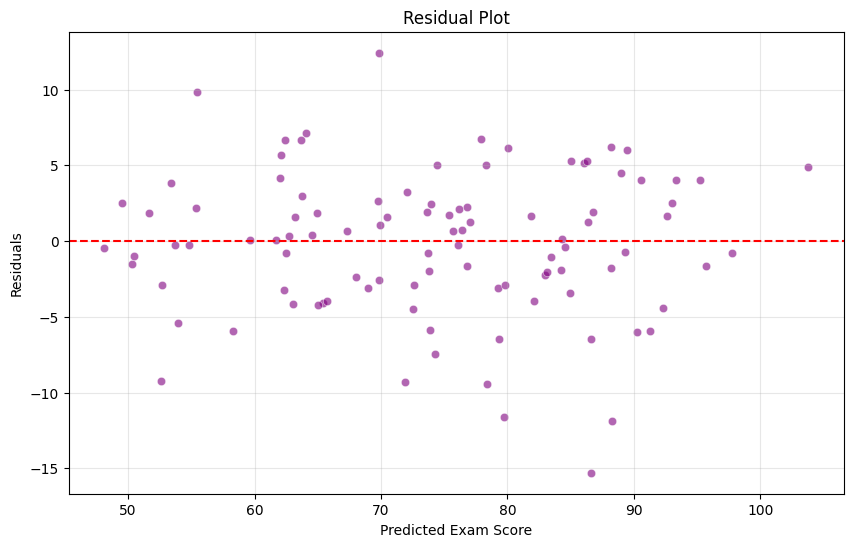

In [4]:
# plot scatter on actual and model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_pred.min(), y_pred.max()],
         color='red',
         linewidth=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.grid(alpha=0.3)
plt.show()

# residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred,
                y=residuals,
                color='purple',
                alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(alpha=0.3)
plt.show()

In [7]:
# predict a new student score
student1 = pd.DataFrame([{
    'self_study_hours': 6.5,
    'exercise_hours':   1.2,
    'mental_health':    7,
    'gaming_hours':     2.5,
    'hang_out_hours':   3.0
}])

score1 = pipeline.predict(student1)[0]
print(f'student1 predict to get {score1:.1f}')

# show model prediction accuracy
# r square
r2 = r2_score(y_test, y_pred)
print(f'Model accuracy by R squre = {r2:.2%}')

# mean absolute percentage error
mape = np.mean(np.abs((y_test-y_pred)/y_test))
print(f'Model accuracy by MAPE = {mape:.2%}')

student1 predict to get 89.8
Model accuracy by R squre = 87.93%
Model accuracy by MAPE = 5.13%
